In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
from salishsea_tools import viz_tools
import cmocean as cm

#### Import data

In [2]:
phys_gridU = xr.open_dataset('/data/dlatorne/MEOPAR/results/sss150/25feb23/sss150_1h_20230225_20230225_grid_U.nc')
phys_gridV = xr.open_dataset('/data/dlatorne/MEOPAR/results/sss150/25feb23/sss150_1h_20230225_20230225_grid_V.nc')
phys_gridT = xr.open_dataset('/data/dlatorne/MEOPAR/results/sss150/25feb23/sss150_1h_20230225_20230225_grid_T.nc')
# test_run_gridU = xr.open_dataset('/data/dlatorne/MEOPAR/results/sss150/test-salish-bash-submit/sss150_1h_20230225_20230225_grid_U.nc')
BoundaryFile = xr.open_dataset('/results/forcing/SalishSeaCast/bdy_ts/ts_S_y2023m02d25.nc')

#Import mesh
mesh = xr.open_dataset('/ocean/mdunphy/SSS150/grid/mesh_mask_southsalishsea150_update202108210102AUM1.nc')
tmask = 1 - mesh.tmask[0]
umask = 1 - mesh.umask[0]

#### Boundary Files

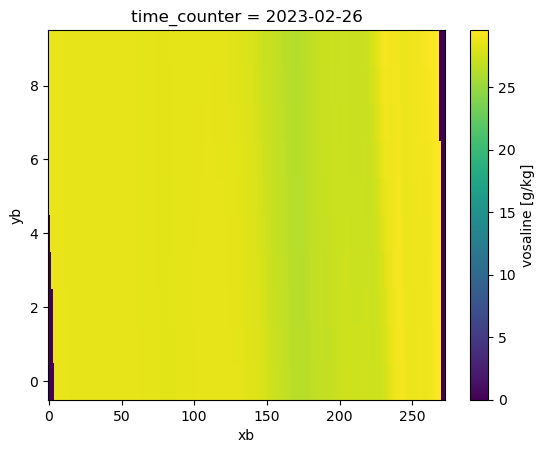

In [3]:
BoundaryFile.vosaline[23,0].plot()

Text(0.5, 0.98, 'Salinity')

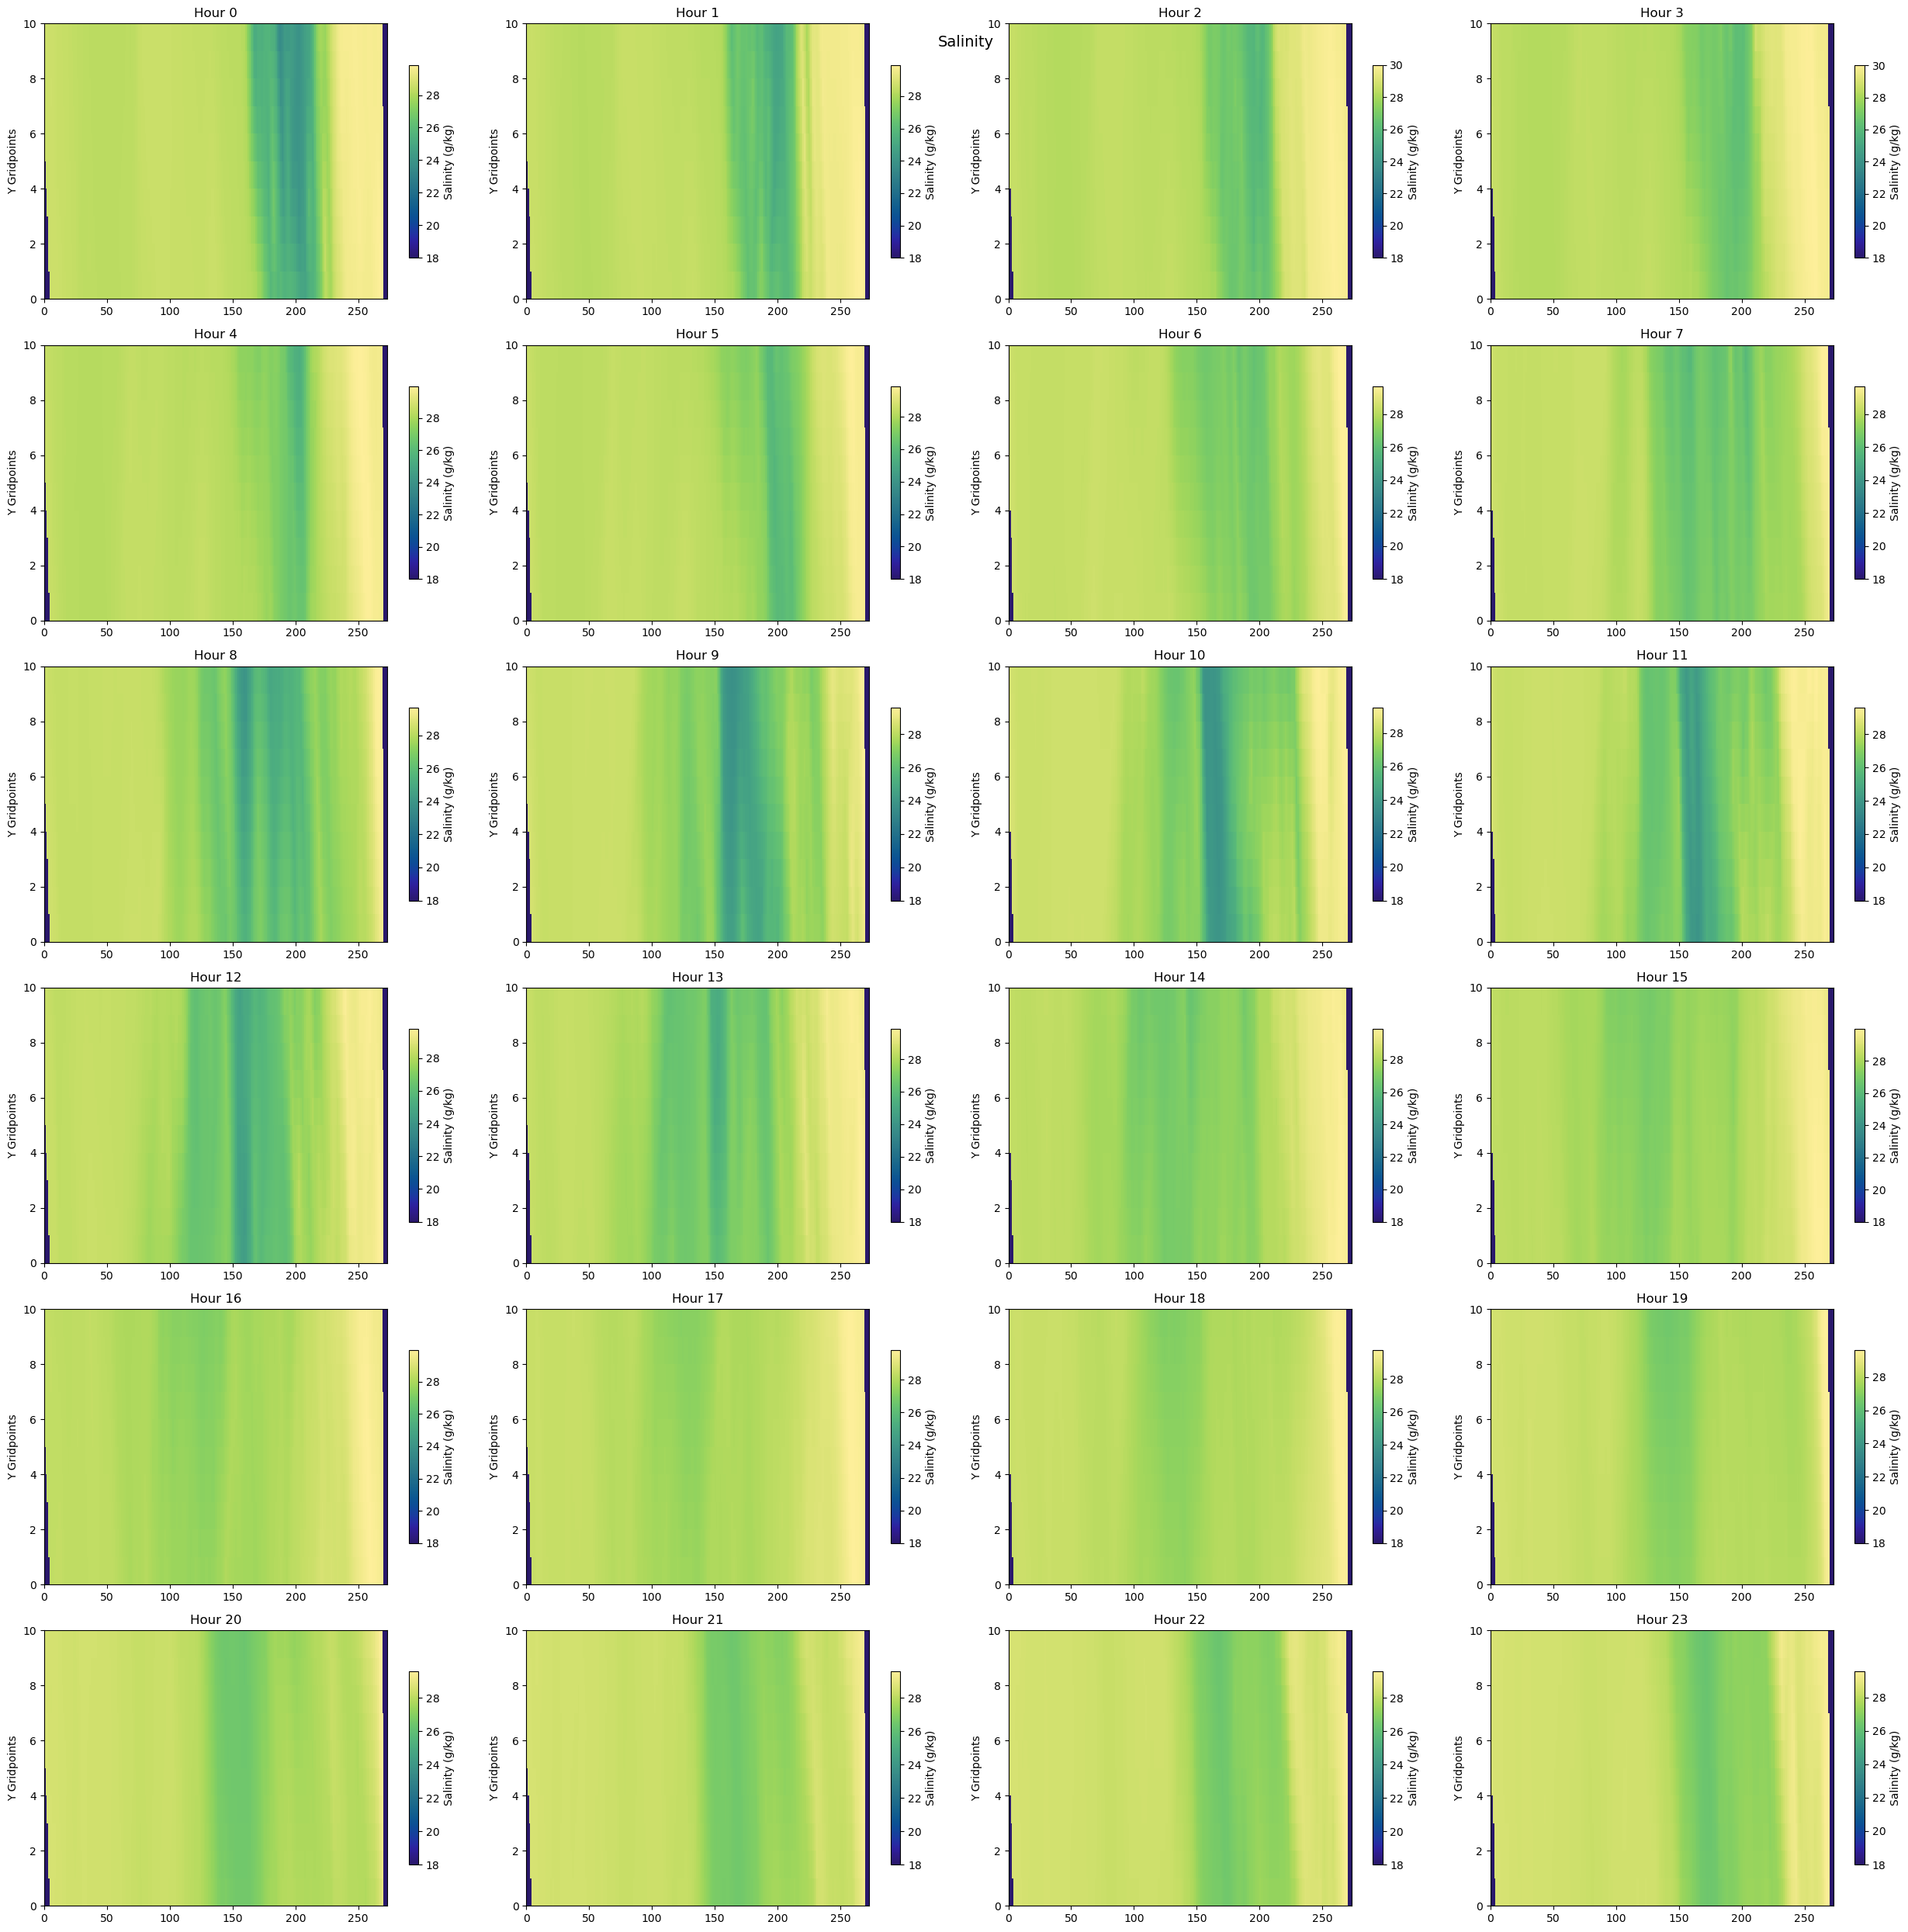

In [5]:
nrows = 6
ncols = 4

fig, ax = plt.subplots(nrows,ncols,figsize=(25, 25))
cmap = cm.cm.haline
cmap.set_bad('gray')

date = pd.DatetimeIndex(phys_gridU.time_counter.values)

for i in range(nrows):
    for j in range(ncols):
    
        vfull = BoundaryFile.vosaline[i*ncols+j, 0]
        ax[i,j].pcolormesh(vfull,vmin=18)
        colours = ax[i,j].pcolormesh(vfull, cmap=cmap,vmin=18)
        cb = fig.colorbar(colours, ax=ax[i,j],shrink=0.7)
        cb.set_label('Salinity (g/kg)')
        # viz_tools.set_aspect(ax[i,j]);
        ax[i,j].set_ylabel('Y Gridpoints')
        ax[i,j].set_title(f'Hour {date[i*ncols+j].hour}')

fig.tight_layout()
fig.suptitle('Salinity',fontsize=14)


Text(0.5, 1.0, '23:30 - 00:30')

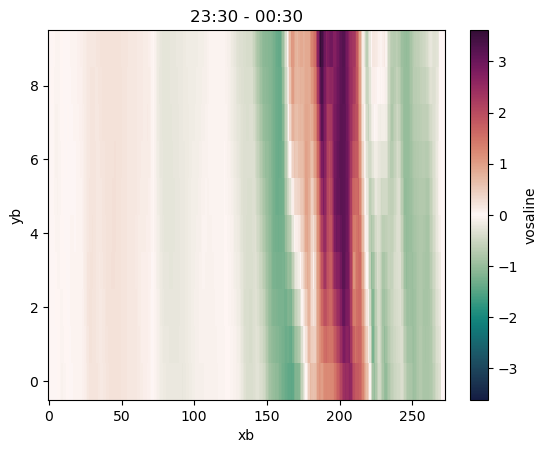

In [11]:
(BoundaryFile.vosaline[23,0]-BoundaryFile.vosaline[0,0]).plot(cmap = cm.cm.curl)
plt.title('23:30 - 00:30')